## Final Project Submission

Please fill out:
* Student name: Tara Mullin
* Student pace: Part time
* Scheduled project review date/time: 
* Instructor name: Victor Geislinger 
* Blog post URL:


## Business Understanding - Defining Objectives & Problem

* **Goal** : Predict the housing prices based on features in the dataset

## Obtain Data

* gather and scrape the data necessary for the project, for example:
    * query from database or API
    * extract from another file
    * generate data

### Import Python Libraries needed for project

In [117]:
import pandas as pd #data processing
from pandas.tools.plotting import scatter_matrix #data processing, scatter matrix
import numpy as np #linear algebra
import statsmodels as sm #python module that provides classes and functions for the estimation of many different stats models, conducting statistical test, and statistical data exploration
from statsmodels.api import formula
%matplotlib inline
import matplotlib.pyplot as plt #plotting
import seaborn as sns #data visualization

### Import, read and analyze the dataset (df)

In [118]:
df = pd.read_csv('kc_house_data.csv')

## Data Cleaning

* Fix inconsistencies within the data and handle the missing values.

    * examine datatypes
    * find missing values (null values)
    * look for filler/placeholder data
    * columns we don't need --> extra indices
    * drop sparse columns
    
    * filtering lines
    * extracting columns
    * replacing values
    * handle missing values
    * converting formates


In [119]:
df.info

<bound method DataFrame.info of                id        date      price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014   221900.0         3       1.00         1180   
1      6414100192   12/9/2014   538000.0         3       2.25         2570   
2      5631500400   2/25/2015   180000.0         2       1.00          770   
3      2487200875   12/9/2014   604000.0         4       3.00         1960   
4      1954400510   2/18/2015   510000.0         3       2.00         1680   
5      7237550310   5/12/2014  1230000.0         4       4.50         5420   
6      1321400060   6/27/2014   257500.0         3       2.25         1715   
7      2008000270   1/15/2015   291850.0         3       1.50         1060   
8      2414600126   4/15/2015   229500.0         3       1.00         1780   
9      3793500160   3/12/2015   323000.0         3       2.50         1890   
10     1736800520    4/3/2015   662500.0         3       2.50         3560   
11     9212900260   5/27/2014   

In [120]:
df.shape #analyzing the number of rows and columns in the data set

(21597, 21)

In [121]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [122]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


* Looking at 5 point statistics with df_houseprices.describe( )

Immediately I'm noticing that max bedrooms is 33. This seems unlikely, so let's investigate more.

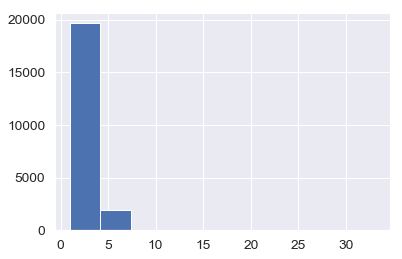

In [123]:
df['bedrooms'].hist()

In [124]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [125]:
df.loc[df['bedrooms']==33] #.loc[] to select the single row

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [126]:
# Since there is only 1 entry with 33 bedrooms, and the other data for this house doesn't make
# sense for a house with 33 rooms (i.e. 1.75 bathrooms, 1,620 sqft, and $640,000), 33 may be a place holder
# I decided to drop the row
#df['bedrooms'] = df['bedrooms'].drop(df['bedrooms'].idxmax(axis=0))
df = df[df.bedrooms !=33] #dropping the row

In [127]:
# checking that that row was dropped
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

## Dealing with Data Types

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 21 columns):
id               21596 non-null int64
date             21596 non-null object
price            21596 non-null float64
bedrooms         21596 non-null int64
bathrooms        21596 non-null float64
sqft_living      21596 non-null int64
sqft_lot         21596 non-null int64
floors           21596 non-null float64
waterfront       19220 non-null float64
view             21533 non-null float64
condition        21596 non-null int64
grade            21596 non-null int64
sqft_above       21596 non-null int64
sqft_basement    21596 non-null object
yr_built         21596 non-null int64
yr_renovated     17754 non-null float64
zipcode          21596 non-null int64
lat              21596 non-null float64
long             21596 non-null float64
sqft_living15    21596 non-null int64
sqft_lot15       21596 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.6+ MB


### sqft_basement is an object...

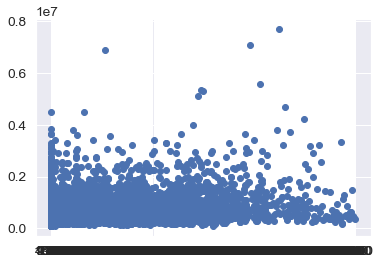

In [129]:
plt.scatter(df.sqft_basement, df.price) 
plt.show()

In [130]:
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
900.0       142
300.0       142
200.0       105
750.0       104
530.0       103
480.0       103
450.0       103
720.0        98
620.0        90
840.0        83
580.0        83
420.0        81
860.0        79
670.0        78
1100.0       78
550.0        76
780.0        76
650.0        75
240.0        74
380.0        73
680.0        73
360.0        72
          ...  
784.0         1
3500.0        1
1248.0        1
3000.0        1
2120.0        1
225.0         1
506.0         1
2360.0        1
1930.0        1
2130.0        1
20.0          1
2810.0        1
415.0         1
2350.0        1
1920.0        1
172.0         1
2190.0        1
1913.0        1
207.0         1
417.0         1
374.0         1
1525.0        1
1281.0        1
1008.0        1
946.0         1
875.0         1
176.0         1
1548.0        1
652.0         1
2730.0        1
Name: sqft_basement, Len

In [131]:
print('Percentage of missing sqft_basement vales:', len(df[df.sqft_basement == '?'])/len(df))

Percentage of missing sqft_basement vales: 0.02102241155769587


It appears that sqft_basement is numeric data, but there are over 450 entries with "?" entries, making it impossible to simply convert from string to numeric. The rows containing '?' are only 2% of the data, so I decided to drop them.

In [132]:
df = df[df.sqft_basement !='?'] #dropping the row

In [133]:
df.sqft_basement = df.sqft_basement.astype('float32') #converting to numerical

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21142 entries, 0 to 21596
Data columns (total 21 columns):
id               21142 non-null int64
date             21142 non-null object
price            21142 non-null float64
bedrooms         21142 non-null int64
bathrooms        21142 non-null float64
sqft_living      21142 non-null int64
sqft_lot         21142 non-null int64
floors           21142 non-null float64
waterfront       18803 non-null float64
view             21081 non-null float64
condition        21142 non-null int64
grade            21142 non-null int64
sqft_above       21142 non-null int64
sqft_basement    21142 non-null float32
yr_built         21142 non-null int64
yr_renovated     17388 non-null float64
zipcode          21142 non-null int64
lat              21142 non-null float64
long             21142 non-null float64
sqft_living15    21142 non-null int64
sqft_lot15       21142 non-null int64
dtypes: float32(1), float64(8), int64(11), object(1)
memory usage: 3.5+ MB

#### Possible categorical data stored as integers:
* zip codes --> likely will bin
* log and lat? bin too?
* waterfront should be a categorical boolean
* bedrooms, bathrooms, floors, grade, view could all be categorical, since there are discrete options, but I could also see how an increase in these would likely positively impact the price
* bin year built and year renovated?

### Detecting & Dealing with Null Values

* Examine how many, how prevalent. Is the missing data random or does it have a pattern?

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21142 entries, 0 to 21596
Data columns (total 21 columns):
id               21142 non-null int64
date             21142 non-null object
price            21142 non-null float64
bedrooms         21142 non-null int64
bathrooms        21142 non-null float64
sqft_living      21142 non-null int64
sqft_lot         21142 non-null int64
floors           21142 non-null float64
waterfront       18803 non-null float64
view             21081 non-null float64
condition        21142 non-null int64
grade            21142 non-null int64
sqft_above       21142 non-null int64
sqft_basement    21142 non-null float32
yr_built         21142 non-null int64
yr_renovated     17388 non-null float64
zipcode          21142 non-null int64
lat              21142 non-null float64
long             21142 non-null float64
sqft_living15    21142 non-null int64
sqft_lot15       21142 non-null int64
dtypes: float32(1), float64(8), int64(11), object(1)
memory usage: 3.5+ MB

* RangeIndex = 21,597 
* Note missing values in **waterfront**,  **view**, & **yr_renovated**

In [136]:
# inspecting null values
total = df.isnull().sum().sort_values(ascending=False)
total

yr_renovated     3754
waterfront       2339
view               61
sqft_lot15          0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
condition           0
sqft_living15       0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
zipcode             0
lat                 0
long                0
id                  0
dtype: int64

In [137]:
# calculate percentage of null values in waterfront
df.waterfront.isna().sum() / df.shape[0]

0.110632863494466

* 11% of our data is null in **waterfront**

In [138]:
# how to address this?
df.waterfront.unique()

array([nan,  0.,  1.])

Approaches to handling null values:
* replace null values with mean
* drop the column
* drop the rows

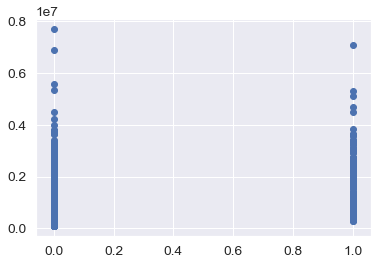

In [139]:
x = df['waterfront']
y = df['price']

plt.scatter(x, y)
plt.show()

In [140]:
#DateFrame that contains only entries that have data for waterfront
df_split_waterfront = df[df.waterfront == df.waterfront]
df_split_waterfront.shape

(18803, 21)

In [141]:
print(df_split_waterfront[df_split_waterfront.waterfront==0].shape, df_split_waterfront[df_split_waterfront.waterfront==1].shape)

(18661, 21) (142, 21)


In [142]:
df_split_waterfront[df_split_waterfront.waterfront==0].describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.866100e+04,1.866100e+04,18661.000000,18661.000000,18661.000000,1.866100e+04,18661.000000,18661.0,18607.000000,18661.000000,18661.000000,18661.000000,18661.000000,18661.000000,15356.000000,18661.000000,18661.000000,18661.000000,18661.000000,18661.000000
mean,4.592226e+09,5.327856e+05,3.372810,2.112976,2074.183967,1.501773e+04,1.493543,0.0,0.203741,3.408928,7.652591,1786.525427,287.658539,1971.135202,78.788942,98077.489148,47.560205,-122.213479,1982.689031,12711.899148
std,2.876030e+09,3.453126e+05,0.900142,0.764442,909.294580,4.098481e+04,0.539589,0.0,0.698835,0.649283,1.166814,825.469273,436.999908,29.329788,388.734251,53.400894,0.138938,0.140580,681.279150,27471.377637
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.0,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.124079e+09,3.200000e+05,3.000000,1.750000,1420.000000,5.040000e+03,1.000000,0.0,0.000000,3.000000,7.000000,1190.000000,0.000000,1952.000000,0.000000,98032.000000,47.471200,-122.328000,1490.000000,5100.000000
50%,3.905082e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.604000e+03,1.500000,0.0,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572400,-122.229000,1840.000000,7616.000000
75%,7.331900e+09,6.385000e+05,4.000000,2.500000,2540.000000,1.059000e+04,2.000000,0.0,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98117.000000,47.678300,-122.125000,2350.000000,10038.000000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,0.0,4.000000,5.000000,13.000000,9410.000000,4130.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [143]:
df_split_waterfront[df_split_waterfront.waterfront==1].describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.420000e+02,1.420000e+02,142.000000,142.000000,142.000000,142.000000,142.000000,142.0,141.000000,142.000000,142.000000,142.000000,142.000000,142.000000,117.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,4.478870e+09,1.731020e+06,3.373239,2.720070,3265.415493,25716.830986,1.626761,1.0,3.780142,3.542254,8.852113,2516.436620,748.978882,1962.521127,458.871795,98096.197183,47.540779,-122.276063,2697.485915,22733.514085
std,2.862214e+09,1.158149e+06,1.101959,1.132797,1668.837423,45039.417864,0.550424,0.0,0.561785,0.740167,1.798136,1296.927545,809.891968,26.916398,841.405244,60.669228,0.112793,0.124645,812.719502,23172.405390
min,1.210290e+08,2.850000e+05,1.000000,0.750000,440.000000,1989.000000,1.000000,1.0,1.000000,1.000000,5.000000,440.000000,0.000000,1905.000000,0.000000,98004.000000,47.327600,-122.514000,750.000000,3230.000000
25%,2.016369e+09,8.212500e+05,3.000000,1.812500,2082.500000,11533.000000,1.000000,1.0,4.000000,3.000000,8.000000,1560.000000,0.000000,1942.000000,0.000000,98040.000000,47.453975,-122.376000,2140.000000,11991.500000
50%,3.692780e+09,1.590000e+06,3.000000,2.500000,2935.000000,17730.500000,2.000000,1.0,4.000000,3.000000,9.000000,2240.000000,580.000000,1960.000000,0.000000,98074.500000,47.548750,-122.270000,2710.000000,16260.500000
75%,7.494475e+09,2.300000e+06,4.000000,3.250000,4127.500000,26692.500000,2.000000,1.0,4.000000,4.000000,10.000000,3220.000000,1270.000000,1984.750000,0.000000,98155.000000,47.607550,-122.209250,3200.000000,24537.500000
max,9.808701e+09,7.060000e+06,6.000000,6.750000,10040.000000,505166.000000,3.000000,1.0,4.000000,5.000000,12.000000,7680.000000,4820.000000,2014.000000,2009.000000,98199.000000,47.772900,-122.059000,4913.000000,192268.000000


*cheapest house on the waterfront is almost more expensive than a quarter of the houses not on the waterfront.



In [144]:
print('Percentage of enteries with waterfront data:', len(df_split_waterfront)/len(df))
print('Percentage of houses on the waterfront:', len(df_split_waterfront[df_split_waterfront.waterfront==1])/len(df_split_waterfront))


Percentage of enteries with waterfront data: 0.889367136505534
Percentage of houses on the waterfront: 0.007551986385151306


* Since 99.2% of the valid values in waterfront are false, I'll drop this column. It provides little insight into price since there are so few true values

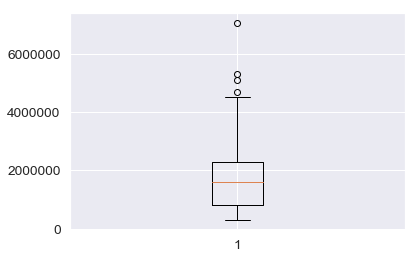

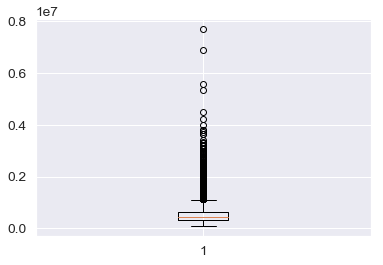

In [145]:
plt.boxplot(df_split_waterfront[df_split_waterfront.waterfront==1]['price'])
plt.show()
plt.boxplot(df_split_waterfront[df_split_waterfront.waterfront==0]['price'])
plt.show()

In [27]:
# benefit of box plot: show outliers and where majority of your data lies
# splitting categories then look at correlation
# plot histograms of prices, square feet, bedrooms
# skewness and kurtosis, if skewed you can start normalizing it (log transformation --> but not with tons of zeros)


In [146]:
df = df.drop('waterfront', axis=1) #drop waterfront column
df = df.drop('id', axis=1) #drop id column, this won't help us predict house price

In [28]:
#business stakeholders: how much/how many? which category? which group?
#goal: predict house price and understand what factors influence it.
#determine the factors/variable that affect salesprice of houses
#1) understand the problem. we will look at each variable and perform analysis about
#their meaning and importnace for this problem
#2) univariable study. focus on teh dependent variable ('SalePrice') to try to know a little bit more about it
#3) bivariate and multivariate study. analyze how the dependent variable and independent variables relate

### Checking for Multicollinearity

* check that the data does not have high multicollinearity, or correlation/covariance between our predictor columns

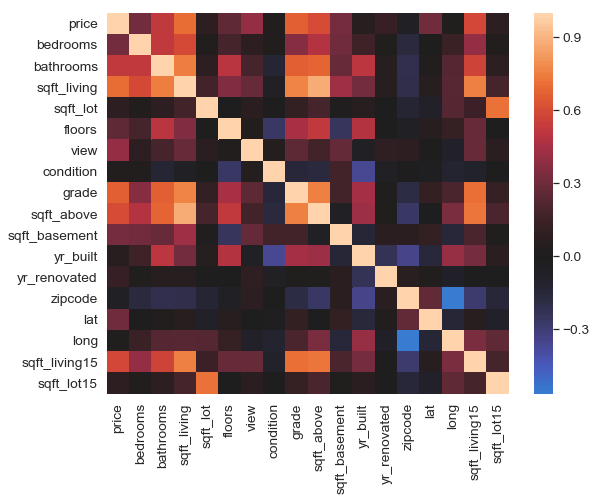

In [175]:
f, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(df.corr(), center = 0);

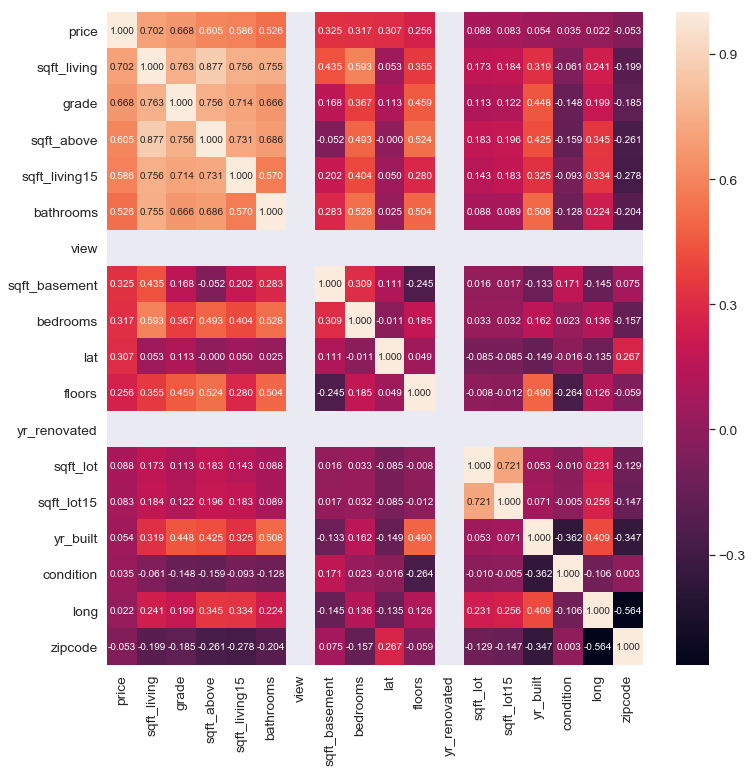

In [160]:
#Annotated heatmap to associate values to the variables
#https://seaborn.pydata.org/examples/heatmap_annotation.html
k = 18 #number of variables for heatmap
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(12, 12))
hm = sns.heatmap(cm,annot=True, fmt='.3f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

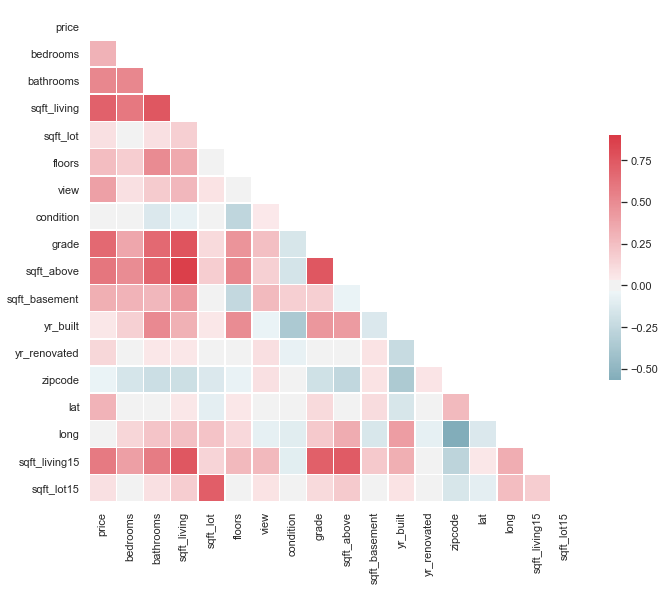

In [154]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [163]:
abs(df.corr())>0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,False,True,True,False,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False
sqft_above,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False


*sqft_living is highly correlated with sqft_above, which makes sense. It may make sense to drop sqft_living and keep sqft_above and sqft_basement in the model
*sqft_living is also highly correlated with bathrooms, grade, and sqft_living15 --> more reason to drop sqft_living?

## Data Exploration

*Form hypotheses about your defined problem by visually analyzing the data and understanding basic statistics


### Basic Statistics of our Target Variable

In [29]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

The minimum is 78,000 and the maximum is 7,700,000. This seems plausible, no red flags off the bat.

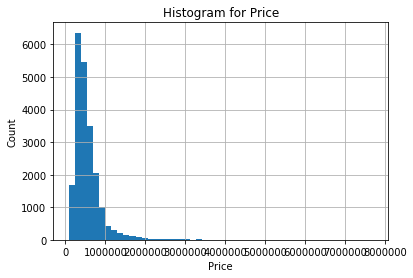

In [30]:
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Histogram for Price')
df.price.hist(bins = 50)

### Basic statistics of our predictors

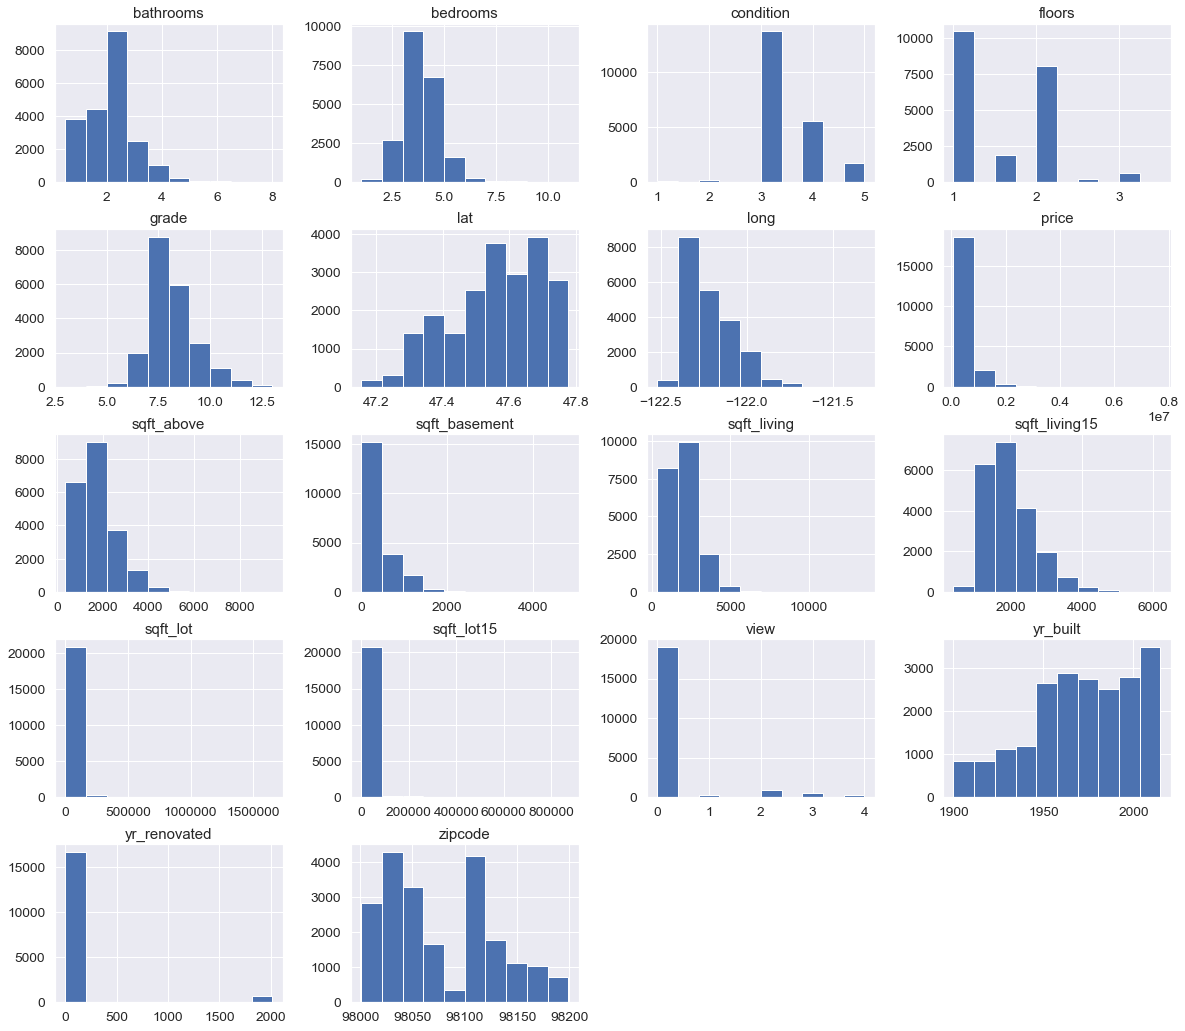

In [162]:
df.hist(figsize = (20,18));

In [32]:
# bedrooms and grade are perhaps closest to a normal distribution, but essentially all variables
# break the normal assumption.
# There is a lot of skewness present, indicating possible outliers

/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


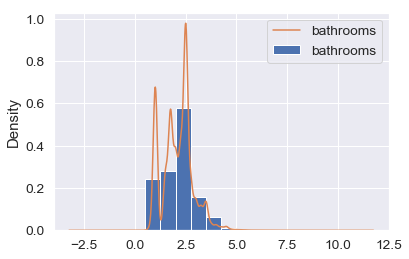

/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


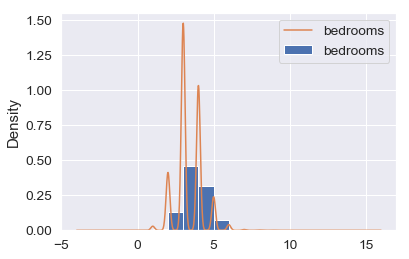

/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


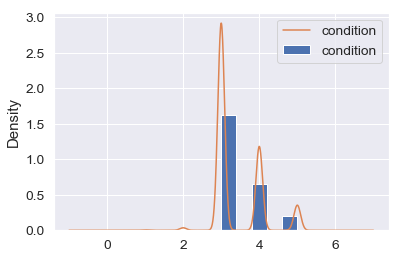

/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


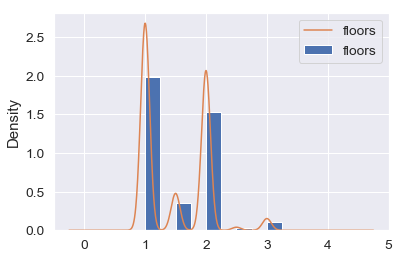

/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


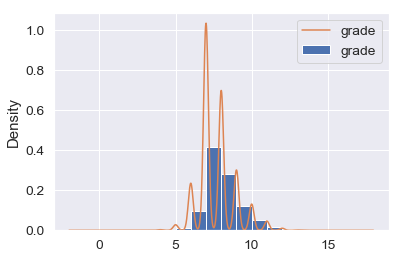

/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


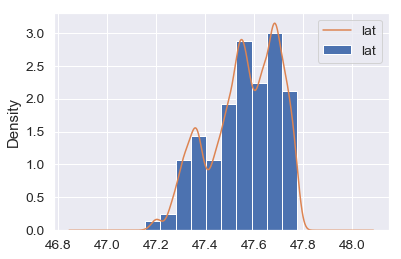

/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


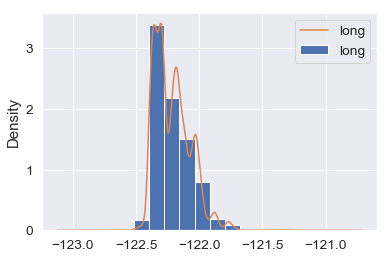

/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


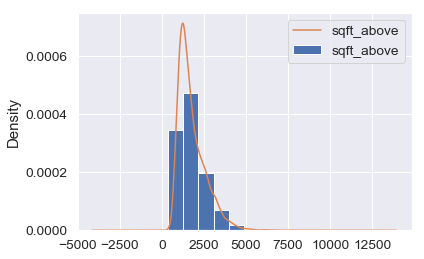

KeyError: 'sqft_basementsqft_living'

In [164]:
for column in ['bathrooms', 'bedrooms', 'condition', 'floors', 'grade', 'lat', 'long', 
               'sqft_above', 'sqft_basement' 'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'view', 'waterfront', 
               'yr_built', 'yr_renovated', 'zipcode']:
    df[column].plot.hist(normed=True)
    df[column].plot.kde(label=column)
    plt.legend()
    plt.show()

/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


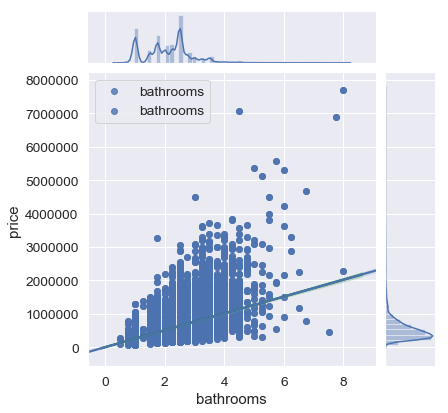

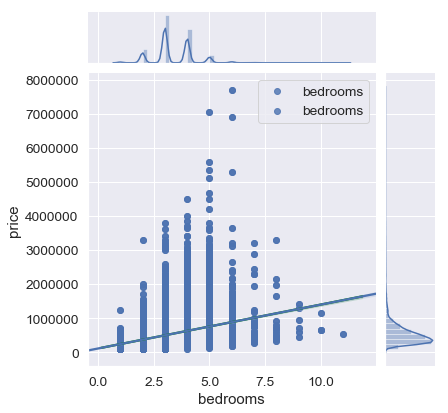

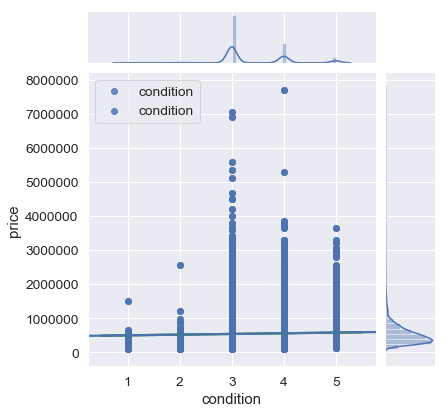

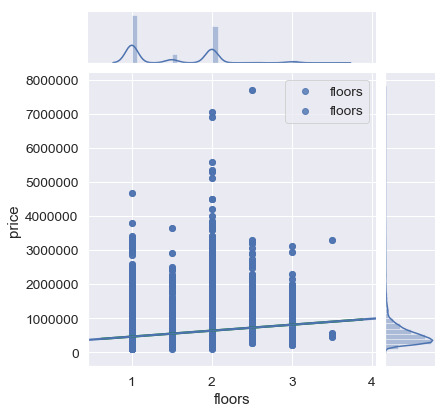

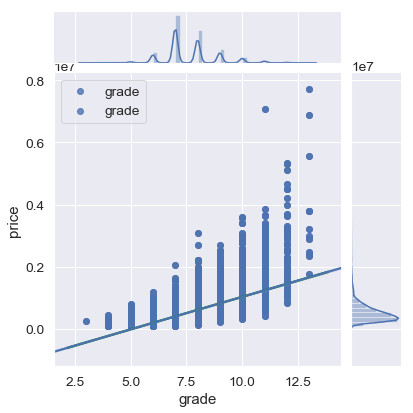

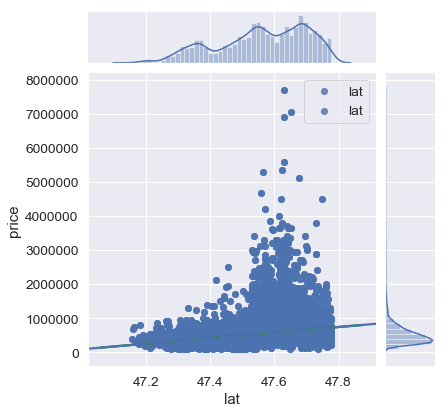

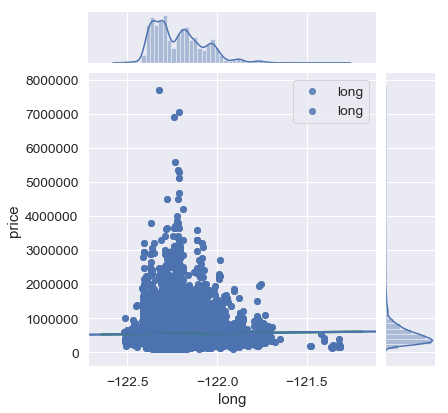

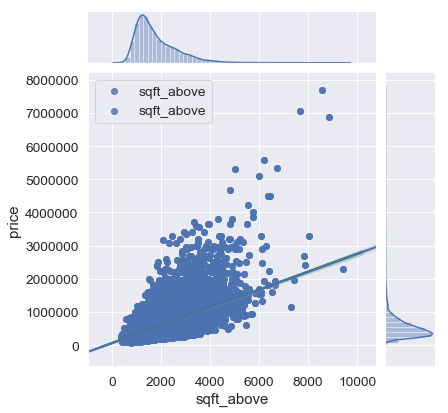

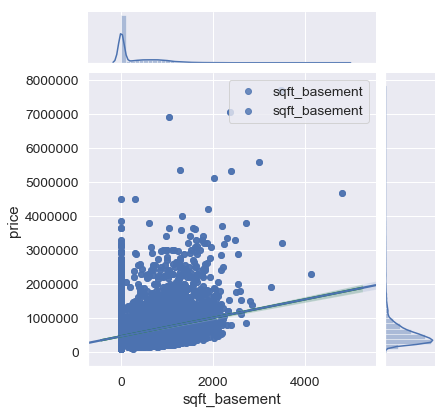

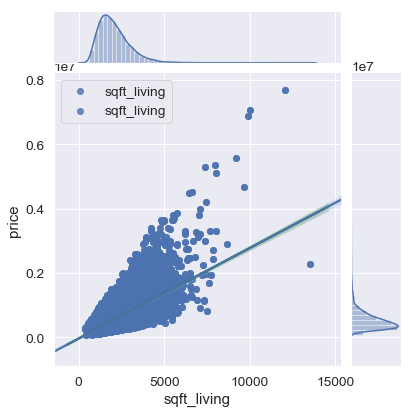

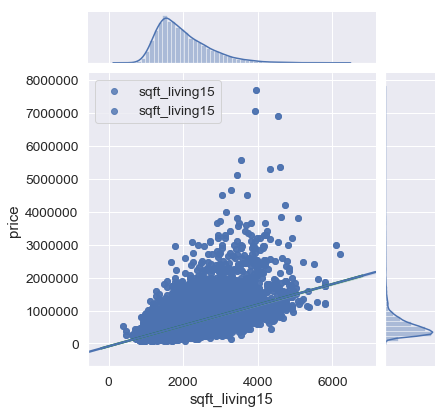

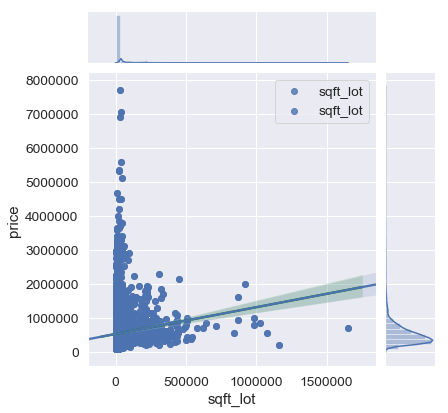

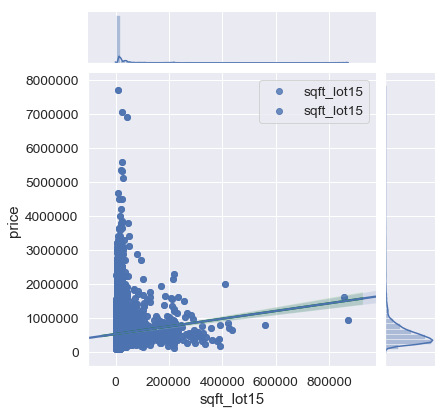

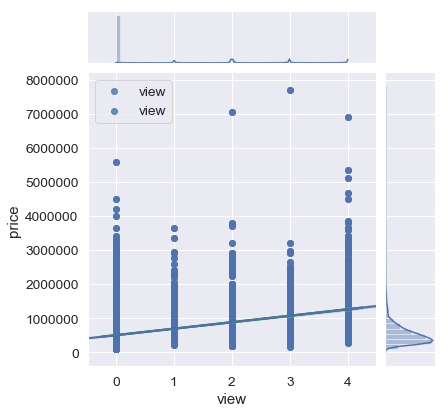

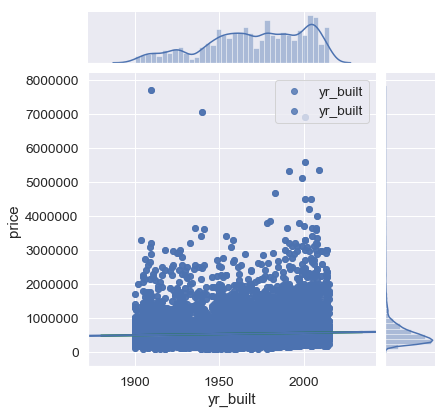

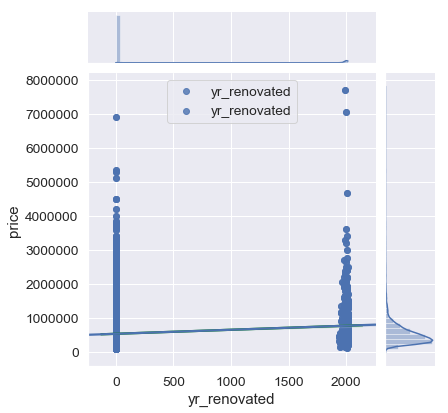

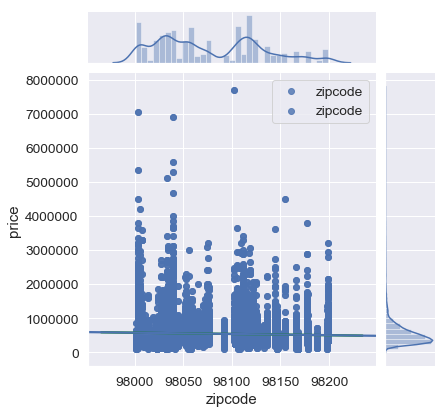

In [189]:
for column in ['bathrooms', 'bedrooms', 'condition', 'floors', 'grade', 'lat', 'long', 
               'sqft_above', 'sqft_basement', 'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'view', 
               'yr_built', 'yr_renovated', 'zipcode']:
    sns.jointplot(x=column, y="price",
                 data=df,
                 kind='reg',
                 label=column,
                 joint_kws={'line_kws':{'color':'green'}})
    sns.regplot(df[column], df.price, label=column)
    plt.legend()
    plt.show()

### Visual Analysis of Predictors

Bathrooms:
*Possible positive relationship between number of bathrooms and price - this maskes sense
*However, there appears to be heteroscedasticity around the simple linear regression line
*The data is also skewed to the right
*Since it's categorical we'll need to one-hot encode

Bedrooms:
*Possible positive relationship with price - this maskes sense
*However, there appears to be heteroscedasticity around the simple linear regression line
*The data is also skewed to the right
*Since it's categorical we'll need to one-hot encode



Conclusions:
*Our key assumptions for regression at this stage don't hold so strong. There are pre-processing techniques we can apply to further clean the data to make it more suitable for modeling


## Feature Engineering

* Select important features and construct more meaningful ones using the raw data that you have
* transformation then scaling

* log transformation: reduces skewness, reduce variability of data,
* min-max scaling: brings values between 0 and 1
* standardization: does NOT make the data more normal, but it will change the mean and standard error
* mean normalization: values between -1 and 1 and a mean of 0

## Predictive Modeling

* Train machine learning models, evaluate the performance, and use them to make predictions

### Initial Model

In [196]:
#Define the problem
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_above', 'sqft_living15', 'sqft_basement', 'sqft_lot','sqft_lot15', 
          'view', 'grade', 'yr_built', 'floors', 'condition']

In [197]:
from statsmodels.formula.api import ols

In [198]:
#fitting model
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     3117.
Date:                Thu, 13 Jun 2019   Prob (F-statistic):               0.00
Time:                        23:38:52   Log-Likelihood:            -2.8925e+05
No. Observations:               21081   AIC:                         5.785e+05
Df Residuals:                   21068   BIC:                         5.786e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.368e+06   1.35e+05     47.000      0.000     6.1e+06    6.63e+06
bedrooms      -4.647e+04   2188.224    -21.235      0.000   -5.08e+04   -4.22e+04
bathrooms      4.802e+04   3592.984     13.366      0.000     4.1e+04    5.51e+04
sqft_above      168.6493      4.038     41.762      0.000     160.734     176.565
sqft_living15    21.0020      3.704      5.670      0.000      13.742      28.262
sqft_basement   169.8867      4.841     35.097      0.000     160.399     179.375
sqft_lot         -0.0467      0.053     -0.876      0.381      -0.151       0.058
sqft_lot15       -0.5267      0.081     -6.470      0.000      -0.686      -0.367
view           7.024e+04   2170.404     32.363      0.000     6.6e+04    7.45e+04
grade          1.184e+05   2327.974     50.864      0.000    1.14e+05    1.23e+05
yr_built      -3646.9174     69.658    -52.354      0.000   -3783.453   -3510.382
floors         2.734e+04   3910.471      6.991      0.000    1.97e+04     3.5e+04
condition      1.922e+04   2540.474      7.566      0.000    1.42e+04    2.42e+04
==============================================================================
Omnibus:                    16505.897   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1230997.784
Skew:                           3.205   Prob(JB):                         0.00
Kurtosis:                      39.883   Cond. No.                     4.50e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.5e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model Refinement
* Tweak & Rerun to Reduce MSE

### Stepwise selection with p-values

* starts with an empty model (which only includes the intercept), and each time, the variable that has an associated parameter estimate with the lowest p-value is added to the model (forward step). After adding each new variable in the model, the algorithm will look at the p-values of all the other parameter estimates which were added to the model previously, and remove them if the p-value exceeds a certain value (backward step). The algorithm stops when no variables can be added or removed given the threshold values.

In [ ]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
                 # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included


In [ ]:
result = stepwise_selection(predictors, data_fin['price'], verbose = True)
print('resulting features:')
print(result)

### Train-Test-Split

In [ ]:
#need to define X and y
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results = np.mean(cross_val_score(linreg, X, y, cv=5, scoring="neg_mean_squared_error"))
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error"))
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring="neg_mean_squared_error"))

### Model Validation Method

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

In [ ]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [ ]:
#look at the residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [ ]:
#compare MSE of train and test set
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

## Interpret & Visualize

* Draw conclusions from data, evaluate meaning of results, communicat the findings through visualizations

## Future Directions